In [36]:
from sklearn.model_selection import cross_validate
from sklearn import linear_model

import numpy as np
import pandas as pd

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
raw_data = pd.read_csv('train.csv', header = 0, sep = ',')

In [12]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
shape(raw_data)

(891, 12)

In [16]:
raw_data.isnull().values.any()

True

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:
train_data = raw_data.iloc[:-200, :]
hold_out_test_data = raw_data.iloc[-200:, :]

In [22]:
raw_data.shape, train_data.shape, hold_out_test_data.shape

((891, 12), (691, 12), (200, 12))

In [24]:
#обучение
train_labels = train_data['Survived'].values
train_data = train_data.drop(['Survived'], axis = 1)
#тест
test_labels = hold_out_test_data['Survived'].values
test_data = hold_out_test_data.drop(['Survived'], axis = 1)

Text(0.5, 1.0, 'test data')

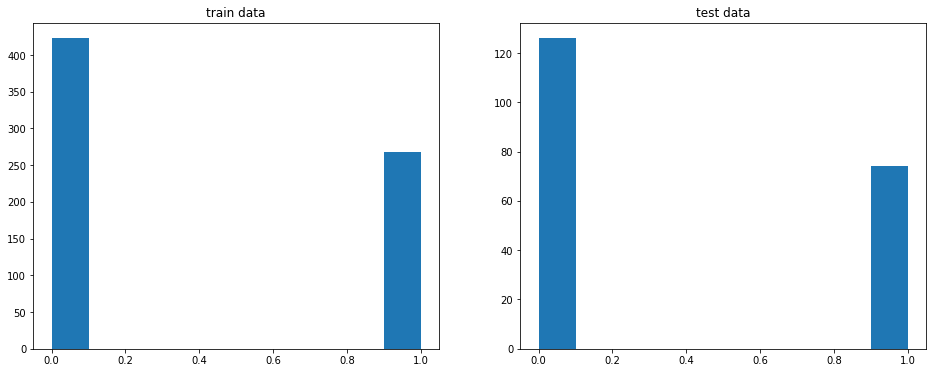

In [29]:
pylab.figure(figsize = (16, 6))

pylab.subplot(1,2,1)
pylab.hist(train_labels)
pylab.title('train data')

pylab.subplot(1,2,2)
pylab.hist(test_labels)
pylab.title('test data')

In [30]:
numeric_columns = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age']
train_data = train_data[numeric_columns]
test_data = test_data[numeric_columns]

In [31]:
train_data.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Age
0,1,3,1,0,7.2500,22.0
1,2,1,1,0,71.2833,38.0
2,3,3,0,0,7.9250,26.0
3,4,1,1,0,53.1000,35.0
4,5,3,0,0,8.0500,35.0


In [32]:
test_data.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Age
691,692,3,0,1,13.4167,4.0
692,693,3,0,0,56.4958,NaN
693,694,3,0,0,7.2250,25.0
694,695,1,0,0,26.5500,60.0
695,696,2,0,0,13.5000,52.0


In [37]:
regressor = linear_model.SGDRegressor(random_state = 0)
regressor.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(test_data))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
regressor.predict(test_data)[:10]